In [2]:
import seaborn as sns

In [3]:
import pandas as pd

## Reading the file

In [4]:
cars_df=pd.read_csv('data_cars2.csv')
cars_df #taking a look at the raw data

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


## 1-Data exploration

In [5]:
cars_df.info() # take a small look at the info 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
cars_df.isnull().sum() # what is missing ?

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [7]:
cars_df.shape # another small look 

(11914, 16)

#### From this step we know the number of rows and columns, which are 4999 rows and 17 columns, the type of each column, and the number of missing data in each column (the Market Category column contains a large amount of missing data, and there is a column called 0 in which all of its data is missing).

## 2-data cleaning

In [8]:
median_EngineHP=cars_df['Engine HP'].median()
median_NumberofDoors=cars_df['Number of Doors'].median()
median_EngineHP,median_NumberofDoors
#The median of each column containing missing data was calculated to fill it.
# for now will fill it like this 
#if it is necessary in our analysis will be filling it manually 

(np.float64(227.0), np.float64(4.0))

In [9]:
cars_df['Engine HP'].fillna(median_EngineHP,inplace=True)
cars_df['Number of Doors'].fillna(median_NumberofDoors,inplace=True)

C:\Users\hussain\AppData\Local\Temp\ipykernel_119988\595008375.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['Engine HP'].fillna(median_EngineHP,inplace=True)
C:\Users\hussain\AppData\Local\Temp\ipykernel_119988\595008375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [10]:
cars_df['Market Category'].fillna('Unknown', inplace=True)
#The Market Category column has a lot of missing data so we can't replace it with the median so the missing data is called unkown
# we dont need it in our analysis

C:\Users\hussain\AppData\Local\Temp\ipykernel_119988\3597555827.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars_df['Market Category'].fillna('Unknown', inplace=True)


In [11]:
cars_df.loc[
    (cars_df['Engine Cylinders'].isnull()) & (cars_df['Engine Fuel Type'] == 'electric'),
    'Engine Cylinders'
] = 0
# electric cars has no cylinders

In [12]:
cars_df.loc[
    (cars_df['Engine Cylinders'].isnull()) & (cars_df['Model'] == 'RX-7'),
    'Engine Cylinders'
] = 2

# this was for the mazda's RX7

In [13]:
cars_df.loc[
    (cars_df['Engine Cylinders'].isnull()) & (cars_df['Model'] == 'RX-8'),
    'Engine Cylinders'
] = 2

# this was for the mazda's RX8 

In [14]:
cars_df[cars_df['Engine Cylinders'].isnull()]
# all clean and ready to analyze

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP


In [15]:
cars_df.loc[cars_df['Engine Fuel Type'].isnull(), 'Engine Fuel Type'] = 'regular'

In [16]:
cars_df.isnull().sum()
# Ensure that there is no missing data.

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [17]:
cars_df['MSRP_formatted']= cars_df['MSRP'].apply(lambda x: "${:,.0f}".format(x))
cars_df
# for our reference we have put a new column with the MSRP in $

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP_formatted
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135,"$46,135"
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650,"$40,650"
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350,"$36,350"
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450,"$29,450"
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500,"$34,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120,"$46,120"
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670,"$56,670"
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620,"$50,620"
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920,"$50,920"


#### In this step, all empty data were filled in using several methods. The column with all missing data was deleted, and the columns that contained reasonably missing data were replaced with the median. There is a column that contains a lot of missing data that was dealt with by naming the missing data as unknown.

## 3- Exploratory Data Analysis

In [18]:
cars_df.describe()
#For numerical value

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.256421,5.618012,3.436377,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,108.888444,1.791925,0.881184,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [19]:
cars_df.select_dtypes(include='object').nunique()
##For categorical value

Make                   48
Model                 915
Engine Fuel Type       11
Transmission Type       5
Driven_Wheels           4
Market Category        72
Vehicle Size            3
Vehicle Style          16
MSRP_formatted       6049
dtype: int64

In [20]:
print(cars_df['Transmission Type'].value_counts())
# general info 

Transmission Type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64


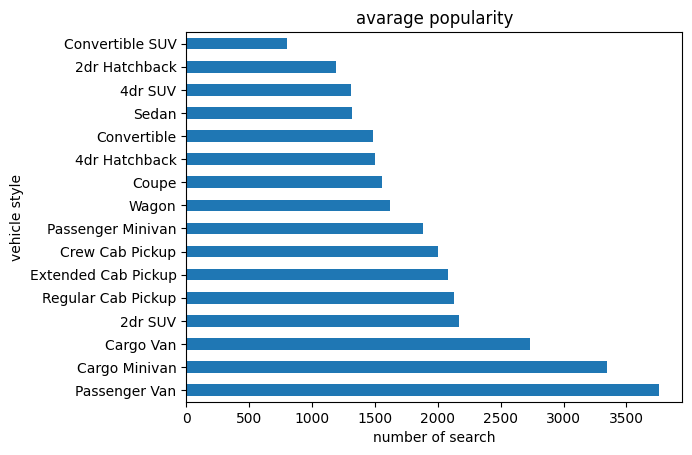

In [50]:
avg_popularity_by_style = cars_df.groupby('Vehicle Style')['Popularity'].mean().sort_values(ascending=False).plot(kind = 'barh');
plt.title("avarage popularity")
plt.xlabel("number of search")
plt.ylabel("vehicle style");
#print(avg_popularity_by_style);
# calculating  the avarage to see what cars are more desirable 

In [22]:
print(cars_df['Vehicle Style'].value_counts())
# counting the availabelity in the market 

Vehicle Style
Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: count, dtype: int64


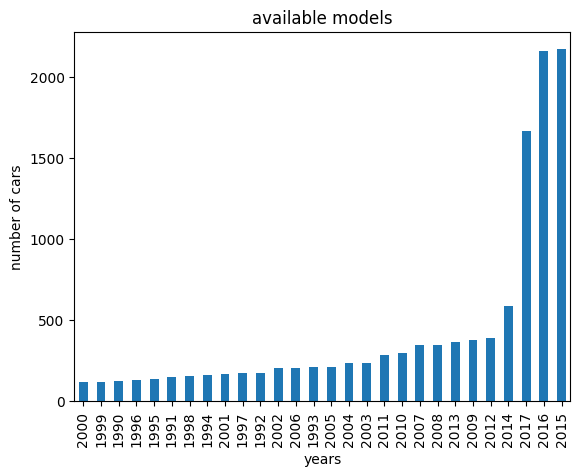

In [48]:
cars_df['Year'].value_counts().sort_values().plot(kind='bar')
plt.title("available models")
plt.xlabel("years")
plt.ylabel("number of cars")
plt.show()
# a look to what years of make we have in the data 

#### In this step, the information contained in the data was explored, such as the average, highest value, lowest value, st, etc., and the most frequently repeated items in each column were also explored.

## 4-problem solving

#### we are about to start up a business which is a showroom for used cars to be spiciffic we want to be specilized in cargo vans , 2dr SUV's and Passenger Vans based on the data we have 

In [24]:
cars_df.corr(numeric_only=True)
#There was no correlations between the catogery we are targeting and the numbers of cilenders or highway MPG

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.350573,-0.041617,0.263946,0.258240,0.198171,0.073049,0.227590
Engine HP,0.350573,1.000000,0.764860,-0.102934,-0.359457,-0.353894,0.036823,0.661402
Engine Cylinders,-0.041617,0.764860,1.000000,-0.141889,-0.618376,-0.590943,0.044185,0.528369
Number of Doors,0.263946,-0.102934,-0.141889,1.000000,0.118925,0.121206,-0.048251,-0.126081
highway MPG,0.258240,-0.359457,-0.618376,0.118925,1.000000,0.886829,-0.020991,-0.160043
city mpg,0.198171,-0.353894,-0.590943,0.121206,0.886829,1.000000,-0.003217,-0.157676
Popularity,0.073049,0.036823,0.044185,-0.048251,-0.020991,-0.003217,1.000000,-0.048476
MSRP,0.227590,0.661402,0.528369,-0.126081,-0.160043,-0.157676,-0.048476,1.000000


In [25]:
avg_popularity_by_style = cars_df.groupby('Vehicle Style')['Popularity'].mean().sort_values(ascending=False)

print(avg_popularity_by_style)
# deciding to go with the top three Vehicle Style as it is has the top 3 avarage Popularity 

Vehicle Style
Passenger Van          3756.109375
Cargo Minivan          3348.169014
Cargo Van              2736.431579
2dr SUV                2171.927536
Regular Cab Pickup     2124.890306
Extended Cab Pickup    2077.489567
Crew Cab Pickup        2002.149780
Passenger Minivan      1879.323741
Wagon                  1619.175676
Coupe                  1558.639141
4dr Hatchback          1498.747863
Convertible            1484.073140
Sedan                  1318.766732
4dr SUV                1307.565916
2dr Hatchback          1188.695652
Convertible SUV         803.034483
Name: Popularity, dtype: float64


In [26]:
print(cars_df['Vehicle Style'].value_counts())
# as we have a high demand on the top 3 Vehicle Style in Popularity and a low value available we will put this three types of vehicle in our showroom

Vehicle Style
Sedan                  3048
4dr SUV                2488
Coupe                  1211
Convertible             793
4dr Hatchback           702
Crew Cab Pickup         681
Extended Cab Pickup     623
Wagon                   592
2dr Hatchback           506
Passenger Minivan       417
Regular Cab Pickup      392
2dr SUV                 138
Passenger Van           128
Cargo Van                95
Cargo Minivan            71
Convertible SUV          29
Name: count, dtype: int64


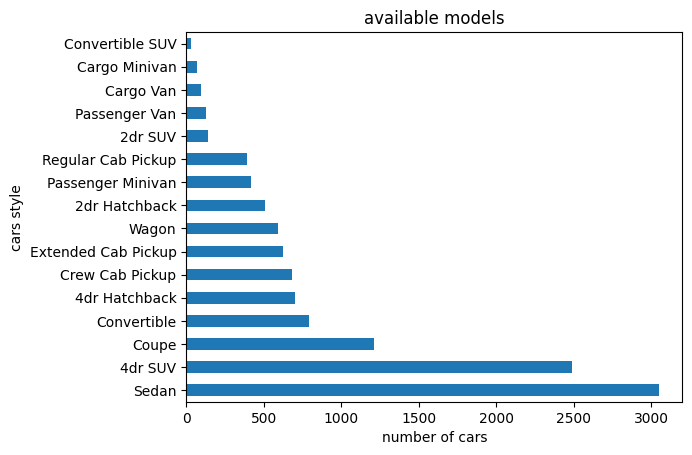

In [51]:
cars_df['Vehicle Style'].value_counts().plot(kind='barh');
plt.title("available models")
plt.xlabel("number of cars")
plt.ylabel("cars style")
plt.show()
# ploting it in a bar chart to make it clear 

Vehicle Style,Cargo Minivan,Cargo Van,Passenger Van
Make,,,
Chevrolet,21.0,11.0,25.0
Dodge,3.0,27.0,5.0
Ford,33.0,32.0,75.0
GMC,6.0,25.0,23.0
Mercedes-Benz,1.0,NaN,NaN
Mitsubishi,1.0,NaN,NaN
Nissan,6.0,NaN,NaN


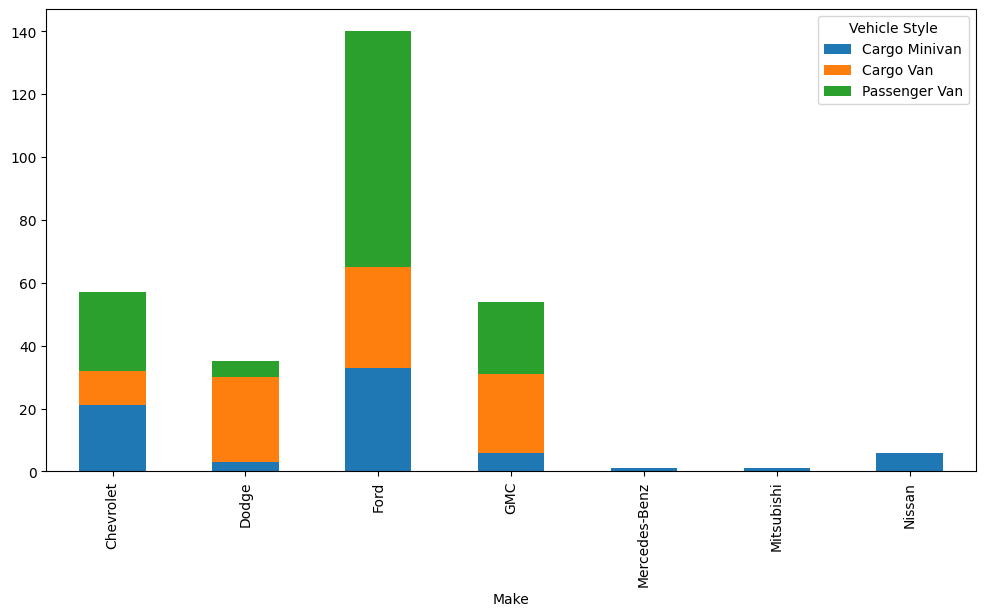

In [29]:
target_styles = ['Cargo Van', 'Cargo Minivan', 'Passenger Van']
filtered_df = cars_df[cars_df['Vehicle Style'].isin(target_styles)]
grouped = filtered_df.groupby(['Vehicle Style', 'Make']).size().unstack()
grouped.T.plot(kind='bar', stacked=True, figsize=(12, 6))
grouped.T
# Ai generated analysis as we didnt learn how to do this in particular and it is nacesery for our analysis 
# last code with same result but with the teaching of Mr.Ali 

In [30]:
target_styles = ['Cargo Van', 'Cargo Minivan', 'Passenger Van']

newer_cars = cars_df[
    (cars_df['Year'] > 2015) &
    (cars_df['Vehicle Style'].isin(target_styles))
]

print(f"Number of cars from after 2015 in target styles: {len(newer_cars)}")
newer_cars.sample(73)
# taking the cars that has been made after 2015 as it is a Used Cars Data and we dont want some old cars 

Number of cars from after 2015 in target styles: 73


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP_formatted
10674,Ford,Transit Connect,2016,regular unleaded,169.0,4.0,AUTOMATIC,front wheel drive,4.0,Unknown,Compact,Cargo Minivan,29,21,5657,23675,"$23,675"
10735,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Large,Passenger Van,19,14,5657,42220,"$42,220"
10722,Ford,Transit Wagon,2016,premium unleaded (recommended),310.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Large,Passenger Van,19,14,5657,42700,"$42,700"
7267,Nissan,NV200,2016,regular unleaded,131.0,4.0,AUTOMATIC,front wheel drive,4.0,Unknown,Compact,Cargo Minivan,26,24,2009,20870,"$20,870"
10669,Ford,Transit Connect,2016,regular unleaded,169.0,4.0,AUTOMATIC,front wheel drive,4.0,Unknown,Compact,Cargo Minivan,29,21,5657,23675,"$23,675"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10730,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Large,Passenger Van,19,14,5657,43370,"$43,370"
10718,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,19,14,5657,33175,"$33,175"
10720,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Large,Passenger Van,19,14,5657,35930,"$35,930"
10732,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Large,Passenger Van,19,14,5657,39475,"$39,475"


In [31]:
# Define top 4 popular styles
top_styles = ['Passenger Van', 'Cargo Minivan', 'Cargo Van', '2dr SUV']

# Filter cars after 2015 and in top 4 styles
newer_cars = cars_df[(cars_df['Year'] > 2015) & (cars_df['Vehicle Style'].isin(top_styles))]

# Print count
print(f"Number of cars from after 2015 in top 4 styles: {len(newer_cars)}")

# Show sample
newer_cars.sample(76)

Number of cars from after 2015 in top 4 styles: 76


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,MSRP_formatted
10710,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,"Flex Fuel,Diesel",Large,Passenger Van,19,14,5657,39735,"$39,735"
9014,GMC,Savana Cargo,2016,flex-fuel (unleaded/E85),285.0,8.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Cargo Van,16,11,549,33915,"$33,915"
7269,Nissan,NV200,2017,regular unleaded,131.0,4.0,AUTOMATIC,front wheel drive,4.0,Unknown,Compact,Cargo Minivan,26,24,2009,21330,"$21,330"
10667,Ford,Transit Connect,2016,regular unleaded,169.0,4.0,AUTOMATIC,front wheel drive,4.0,Unknown,Compact,Cargo Minivan,29,21,5657,22675,"$22,675"
10712,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,19,14,5657,34470,"$34,470"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7267,Nissan,NV200,2016,regular unleaded,131.0,4.0,AUTOMATIC,front wheel drive,4.0,Unknown,Compact,Cargo Minivan,26,24,2009,20870,"$20,870"
10720,Ford,Transit Wagon,2016,flex-fuel (unleaded/E85),275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Large,Passenger Van,19,14,5657,35930,"$35,930"
4445,Chevrolet,Express,2016,flex-fuel (unleaded/E85),285.0,8.0,AUTOMATIC,rear wheel drive,3.0,Flex Fuel,Midsize,Passenger Van,16,11,1385,34815,"$34,815"
10729,Ford,Transit Wagon,2017,regular unleaded,275.0,6.0,AUTOMATIC,rear wheel drive,3.0,Diesel,Large,Passenger Van,19,14,5657,42075,"$42,075"


In [32]:
# Define the target styles
target_styles = ['Cargo Van', 'Cargo Minivan', 'Passenger Van']

# Filter only rows with those vehicle styles
filtered_vans = cars_df[cars_df['Vehicle Style'].isin(target_styles)]

# Group by Make and count how many vehicles of each
van_counts_by_make = filtered_vans['Make'].value_counts()

# Display the results
print(van_counts_by_make)

Make
Ford             140
Chevrolet         57
GMC               54
Dodge             35
Nissan             6
Mercedes-Benz      1
Mitsubishi         1
Name: count, dtype: int64


In [33]:
cars_df.groupby(['Make', 'Vehicle Style'])['Model'].count()

Make   Vehicle Style
Acura  2dr Hatchback     28
       4dr Hatchback      7
       4dr SUV           62
       Coupe             20
       Sedan            129
                       ... 
Volvo  4dr SUV           71
       Convertible        3
       Coupe              3
       Sedan            100
       Wagon             98
Name: Model, Length: 287, dtype: int64

In [34]:
xx = cars_df.groupby(['Make', 'Vehicle Style'])['Model'].count().reset_index()#.plot(kind='bar', stacked=True)
xx = xx[xx['Vehicle Style'].isin(target_styles)]
xx

,Make,Vehicle Style,Model
44,Chevrolet,Cargo Minivan,21
45,Chevrolet,Cargo Van,11
52,Chevrolet,Passenger Van,25
67,Dodge,Cargo Minivan,3
68,Dodge,Cargo Van,27
74,Dodge,Passenger Van,5
88,Ford,Cargo Minivan,33
89,Ford,Cargo Van,32
95,Ford,Passenger Van,75
101,GMC,Cargo Minivan,6


In [35]:
import matplotlib.pyplot as plt


In [36]:
xx

,Make,Vehicle Style,Model
44,Chevrolet,Cargo Minivan,21
45,Chevrolet,Cargo Van,11
52,Chevrolet,Passenger Van,25
67,Dodge,Cargo Minivan,3
68,Dodge,Cargo Van,27
74,Dodge,Passenger Van,5
88,Ford,Cargo Minivan,33
89,Ford,Cargo Van,32
95,Ford,Passenger Van,75
101,GMC,Cargo Minivan,6


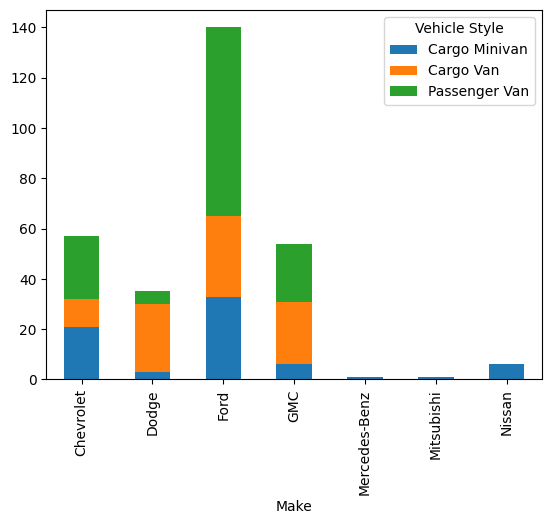

In [52]:
pd.pivot_table(xx, values='Model', columns=['Vehicle Style'], index=['Make']).plot(kind='bar', stacked='bar');